# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# Import the datasets

In [2]:
numerical = pd.read_csv('numerical.csv')
numerical.shape

(95412, 315)

In [3]:
categorical = pd.read_csv('categorical.csv')
categorical.shape

(95412, 22)

In [4]:
targets = pd.read_csv('target.csv')
targets.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [5]:
data = pd.concat([numerical, categorical, targets], axis = 1)
data.shape

(95412, 339)

In [6]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [7]:
data.isna().sum().sum() # check for NaNs

0

# X-y Split

In [8]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)


# Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Num - Cat Split

In [10]:
numerical_X_train = X_train.select_dtypes(np.number)
categorical_X_train = X_train.select_dtypes(object)

In [42]:
categorical_X_train.shape

(76329, 7)

In [11]:
numerical_X_test = X_test.select_dtypes(np.number)
categorical_X_test = X_test.select_dtypes(object)

# MinMax Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
def MinMax(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    print(X_normalized.shape)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [13]:
MinMaxtransformer = MinMaxScaler().fit(numerical_X_train)

In [14]:
X_train_num_scaled = MinMax(numerical_X_train, MinMaxtransformer)
X_test_num_scaled = MinMax(numerical_X_test, MinMaxtransformer)

(76329, 331)
(19083, 331)


# PCA (X numerical)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()
pca.fit(X_train_num_scaled)

PCA()

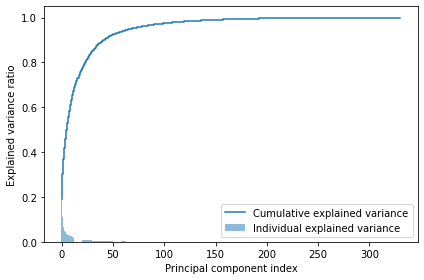

In [17]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [18]:
pca.explained_variance_ratio_[:43].sum()

0.9023101416835055

In [19]:
pca = PCA(43)
pca.fit(X_train_num_scaled)

PCA(n_components=43)

In [20]:
X_train_pca = pca.transform(X_train_num_scaled)
X_test_pca = pca.transform(X_test_num_scaled)

In [21]:
X_train_pca=pd.DataFrame(X_train_pca)

X_test_pca=pd.DataFrame(X_test_pca)

In [22]:
X_test_pca # columns are the PCAs. Column '0' is the PC-1. And so on..

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.712544,-0.211636,0.289698,0.109147,0.357792,-0.769445,-0.175002,0.192619,-0.027364,0.277773,-0.142042,-0.201732,0.106820,-0.277840,0.119359,0.512093,-0.007644,-0.028842,-0.317344,-0.044140,-0.419197,0.157796,0.269379,0.189661,-0.060456,-0.148237,-0.138273,0.372083,-0.033147,-0.014832,-0.050326,-0.130944,0.080908,0.118136,0.289576,0.061913,-0.071545,0.181875,0.307642,0.105040,-0.033632,-0.000950,-0.144856
1,-0.694900,1.092966,-1.436437,-0.020559,-0.757329,0.246279,0.938025,-0.032706,0.599410,-0.000068,0.129284,0.466212,-0.585768,-0.684918,0.781612,-0.026390,0.237847,-0.422252,0.059894,0.472928,-0.293590,-0.552730,0.209009,0.279021,-0.029525,-0.378258,-0.164444,0.046630,0.215019,-0.105739,0.103673,-0.367716,0.025655,-0.091107,-0.234883,-0.093788,-0.026592,0.101484,-0.095274,0.050246,0.005419,-0.260123,0.276001
2,2.140487,-0.894072,-0.815752,0.124406,-0.008135,-0.650849,0.125880,0.835796,-0.179445,0.198151,0.187235,0.093113,-0.386762,-0.061748,-0.084581,-0.048356,-0.205081,0.195030,-0.148167,-0.090127,-0.213087,-0.032769,0.430495,-0.330900,-0.033237,-0.519282,0.010775,-0.070393,-0.147573,0.119750,-0.011054,0.224024,0.020648,0.039490,0.230714,0.242614,-0.013483,-0.239562,-0.059915,0.062059,-0.004462,0.264775,0.258209
3,0.833407,-0.824259,-0.531393,-0.537991,-0.194236,0.374631,0.159418,-0.674352,0.488104,0.296993,0.476977,0.401002,0.370559,-0.472314,0.054452,0.039482,-0.354353,0.038657,-0.158437,-0.023755,0.129899,-0.094328,-0.164034,-0.398228,-0.455017,-0.035707,0.482764,-0.159170,-0.057893,-0.373070,-0.036509,0.313660,-0.028722,-0.088577,-0.355660,0.171350,-0.071548,-0.081125,-0.031384,-0.081480,0.031921,0.103753,0.051292
4,-0.262862,0.090890,-0.032226,-1.483796,-0.361858,0.935950,0.137108,0.656436,-0.117394,0.548320,-0.543618,-0.247719,-0.251770,-0.046164,-0.255706,0.059265,-0.114729,0.930988,-0.497833,-0.086952,0.207173,-0.109070,-0.020776,0.322504,0.108953,0.336923,0.051860,-0.080269,0.138051,0.227286,0.458691,0.356863,0.101371,0.144783,-0.127321,0.253884,-0.305311,0.293617,-0.042450,0.119778,0.432343,0.871647,0.568335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,-1.346307,-0.227878,-0.196504,-0.377594,0.330152,0.269125,-0.756301,0.162775,-0.179059,0.001397,0.129269,-0.321976,0.178649,0.525976,0.192944,0.161847,-0.245765,0.005062,-0.438800,-0.249407,0.317048,0.114336,-0.208133,-0.050604,0.310874,0.182668,-0.671916,-0.035957,-0.431701,0.104624,-0.006904,0.078408,0.329571,0.273581,-0.154331,0.169395,0.075828,0.270736,0.173650,0.093871,-0.035770,0.130990,0.087960
19079,-0.326421,-0.195721,-0.993375,0.166664,0.011270,0.393618,0.556285,-0.066198,0.407895,-0.190673,1.034429,0.037205,-0.298185,-0.189904,-0.180294,0.218094,-0.548743,0.183056,0.514370,0.003026,0.417003,-0.102262,0.340121,-0.483761,0.155430,0.420673,0.050105,-0.020675,0.336804,0.027125,-0.092602,-0.100506,0.207872,0.656816,-0.009711,0.365091,-0.085754,0.184345,-0.112831,-0.043032,-0.075673,-0.176746,0.198601
19080,-1.950941,-0.908321,0.338615,0.426581,-0.717896,-0.502153,0.001059,-0.144213,0.001888,-0.592653,0.004439,-0.711113,-0.213139,-0.129510,0.242156,0.196466,0.045632,-0.146193,-0.109793,-0.095843,0.033326,0.309113,0.215807,0.065418,0.011825,-0.041949,0.027251,-0.034447,0.057804,-0.089002,0.080759,0.018707,-0.130077,0.279440,0.242474,-0.127317,-0.339755,0.221532,0.079724,-0.014198,-0.160716,-0.132731,0.088459
19081,-1.362325,0.600799,-0.401085,-0.063181,0.760142,-0.204843,-0.513236,-0.215806,-0.496170,0.743524,-0.345772,-0.002980,0.228583,-0.349935,0.137728,-0.312516,0.180016,-0.071319,-0.173226,-0.333266,0.337413,0.008181,-0.233663,-0.337818,-0.127376,0.108904,0.038910,-0.190418,-0.088315,-0.162485,0.054801,-0.194224,0.099905,0.091986,0.290675,0.024691,0.072006,-0.029228,0.128780,0.185068,0.094349,0.018906,0

In [ ]:
categorical_X_train

# One-Hot Encoding

## X_train

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(categorical_X_train) # keep the encoder
cols=encoder.get_feature_names_out(input_features=categorical_X_train.columns)
encoded = encoder.transform(categorical_X_train).toarray()
X_train_encoded = pd.DataFrame(encoded,columns=cols)

In [31]:
X_train_encoded.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_train_encoded.shape

(76329, 24)

## X_test

In [32]:
cols=encoder.get_feature_names_out(input_features=categorical_X_test.columns)
encoded = encoder.transform(categorical_X_test).toarray()
X_test_encoded = pd.DataFrame(encoded,columns=cols)


In [33]:
X_test_encoded.head()


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
X_test_encoded.shape

(19083, 24)

# Reset Index

In [36]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [37]:
X_train_encoded=X_train_encoded.reset_index(drop=True)
X_test_encoded=X_test_encoded.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_train.reset_index(drop=True)
X_train_pca=X_train_pca.reset_index(drop=True)
X_test_pca=X_test_pca.reset_index(drop=True)

In [38]:
display(X_train_encoded.isna().sum().sum())
display(X_train_pca.isna().sum().sum())

display(X_test_encoded.isna().sum().sum())
display(X_train_pca.isna().sum().sum())

0

0

# Concatenating

## Train

In [39]:
X_train_processed = pd.concat([X_train_pca, X_train_encoded], axis = 1)

In [40]:
X_train_processed.isna().sum().sum()

0

In [41]:
X_train_processed.shape

(76329, 67)

## Test

In [51]:
X_test_processed = pd.concat([X_test_pca, X_test_encoded], axis = 1)

In [52]:
X_test_processed.isna().sum().sum()

0

In [53]:
X_test_processed.shape

(19083, 67)

# Oversampling the training set

In [43]:
from sklearn.utils import resample

In [44]:
train = pd.concat([X_train_processed, y_train],axis=1)

In [45]:
not_donate = train[train['TARGET_B']==0]
donate = train[train['TARGET_B']==1]

In [46]:
display(not_donate.shape)
display(donate.shape)

(72486, 68)

(3843, 68)

In [47]:
# oversample minority
donate_oversampled = resample(donate, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(not_donate))#<- make both sets the same size


In [48]:
display(not_donate.shape)
display(donate_oversampled.shape)
donate_oversampled.head()

(72486, 68)

(72486, 68)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
48882,0.477724,2.193500,0.679492,-0.148473,-0.494914,-0.383275,-0.478274,-0.399049,-0.236855,-0.835085,0.604442,-0.499916,0.430038,0.466221,-0.175743,-0.449786,-0.063269,0.437502,0.450160,0.477733,-0.256605,-0.456307,-0.202969,0.173318,-0.044316,0.232412,0.171926,0.192250,-0.112224,-0.217031,0.006815,-0.056096,-0.074705,0.070896,-0.085076,-0.027318,0.413542,0.048382,0.076825,-0.230824,-0.062397,-0.317265,0.150331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16359,-0.110126,0.159130,0.047752,-0.043241,-0.494058,-0.022062,-0.182877,-0.578192,-0.881877,0.869887,0.001105,0.009048,0.048454,-0.332652,-0.509519,0.265922,0.021241,-0.202686,0.335348,0.148969,-0.263520,-0.100790,-0.180666,0.139719,-0.339166,0.029940,-0.028821,-0.196544,0.080792,0.210934,0.063340,-0.380634,0.270085,-0.045356,0.085065,0.058849,-0.017390,0.082557,0.021002,0.070830,0.153773,0.121625,-0.257835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
7584,-1.362576,-0.494515,0.452735,-0.023023,-0.631580,0.160902,-0.112650,-0.427815,0.086644,0.140070,0.187392,-0.250485,-0.007646,0.616055,-0.164806,-0.010288,0.256003,0.223525,-0.122138,-0.453030,-0.236670,0.211873,-0.109055,0.308788,0.473492,-0.181713,-0.596885,-0.158030,-0.205602,0.178472,0.073968,-0.388781,0.170353,-0.346254,-0.030019,0.033991,-0.079349,0.002846,0.049345,0.080124,0.025224,0.163107,0.017579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
11006,-1.536473,0.100576,0.009274,0.682466,-0.021646,0.653942,-0.014058,-0.405878,-0.231373,-0.326683,0.370302,0.639234,-0.182330,-0.061123,0.025383,-0.272395,-0.257330,0.199790,0.002489,0.034154,-0.048200,0.089951,-0.365021,0.072945,0.178378,-0.337482,0.034173,-0.177941,-0.072343,0.022185,0.082137,0.143883,-0.094142,0.164947,-0.232749,0.267611,0.022684,0.255787,0.368792,0.123756,0.047619,0.267925,-0.038039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
62471,-1.395981,-0.176171,-0.014818,-0.311240,0.310351,-0.553143,-0.334853,0.366098,-0.312484,0.196835,-0.393327,-0.393665,-0.111134,-0.062259,0.137871,-0.060979,0.139799,-0.182274,0.076841,0.037506,0.544276,0.050653,0.203085,-0.140569,-0.061984,0.340410,-0.381132,-0.346440,-0.112841,0.339652,0.185018,-0.281665,-0.109150,0.117494,0.287147,-0.149835,-0.074195,0.069557,0.125706,0.146077,-0.119221,0.014894,0.110034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [49]:
train_oversampled = pd.concat([not_donate,donate_oversampled],axis=0)
train_oversampled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,-0.191245,0.388369,-0.614840,-0.454519,0.643731,0.470453,-0.122576,-0.205375,0.351506,-0.335256,-0.166504,-0.067369,0.747486,0.201132,0.339115,-0.451607,0.171380,-0.165947,-0.245188,-0.523148,-0.147677,-0.120938,-0.262610,-0.096521,-0.096505,0.138157,-0.037771,-0.294539,0.059849,0.287610,-0.151406,-0.235883,0.090873,0.269759,-0.204097,0.000233,-0.292851,-0.190934,-0.008773,0.086055,0.107991,0.311875,-0.215692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-1.666363,-0.240483,-0.122859,0.286083,-0.693259,0.955253,0.104793,-0.451798,-0.137117,0.070466,-0.457896,-0.374917,-0.368007,-0.189725,0.395527,0.431353,-0.110414,0.133043,-0.020860,-0.031788,-0.227742,0.134120,0.078157,0.222185,0.127013,-0.370744,0.024980,0.049326,-0.500319,-0.018394,0.062338,0.033690,0.150876,-0.093644,0.034008,-0.028589,-0.125130,0.056881,-0.075993,-0.160920,0.000218,0.023729,0.035561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,1.517049,-0.051505,-1.278353,0.563133,0.073525,-0.895422,-0.492257,0.298029,0.513712,0.250897,-0.219519,-0.443636,0.087466,-0.213870,-0.401148,-0.246614,-0.082269,-0.128466,-0.133691,0.090272,-0.129277,-0.091260,-0.158359,0.010463,-0.130127,-0.375521,0.035580,-0.167625,-0.099038,-0.097383,-0.142786,-0.009499,0.030372,0.243756,0.242328,0.014654,-0.067846,0.143337,-0.132336,0.078926,-0.245196,-0.001202,0.135255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.035035,0.407597,0.470557,-1.425919,0.123620,0.583938,-0.086779,0.326467,-0.212815,-0.063443,-0.601763,-0.058190,-0.067363,-0.127748,-0.221735,0.353347,-0.529498,0.474379,-0.337853,0.045638,0.176378,-0.004254,0.285511,0.138318,-0.132120,0.001376,0.088774,-0.075361,0.264030,0.399088,-0.345791,-0.029912,0.346879,0.098117,-0.198553,-0.096580,-0.041927,-0.000380,-0.084428,-0.142038,-0.025677,0.292230,0.262326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,-0.919675,0.372147,-1.276004,0.192990,0.604596,-0.771131,-0.383249,-0.535808,-0.246280,0.571222,0.180667,-0.325593,0.384596,-0.166931,-0.337352,-0.057112,0.386987,-0.039684,-0.025789,0.090835,-0.395278,-0.055143,0.334296,-0.147525,-0.655281,-0.181281,-0.127274,0.370993,-0.146469,-0.143690,0.205455,-0.110006,-0.021802,-0.019918,-0.015676,-0.083908,-0.001069,-0.089862,-0.135706,0.060211,0.019667,0.056241,0.055968,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [50]:
y_train_over = train_oversampled['TARGET_B']
X_train_over = train_oversampled.drop('TARGET_B',axis = 1)

#  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_over, y_train_over)
print(clf.score(X_train_over, y_train_over))
print(clf.score(X_test_processed, y_test))

y_pred = clf.predict(X_test_processed)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
